# D209 - Data Mining 1 Performance Assessment Task 1
Aidan Soares, 012042436, Western Governors University

### A1: Research Question
For this assessment, I will be using the Churn dataset to answer the question "Can a k-nearnest neighbors classification system be utilized to effectively predict the likelihood of customer churn?". I have utilized a similar question in D208's task 2 but I could not get a conclusive answer from logistic regression as my predictive model was not the most accurate possible. I am hoping that I will be able to see better results through utilizing k-Nearest Neighbors classification. Competition in the telecommunications industry is diverse and strong, with each company competing for significant market share. Everyone requires telecom services in some form or another, so with a finite pool of available customers companies strive to bolster customer retention and are constantly developing new marketing campaigns to grow market capitalization. To the company, these costs of accruing new customers are high and take resources and time that could be better spend on the development of better service packages and offerings. As such, it is within the best interests of the telecommunications company to strive to build strong customer relationships to reduce the likelihood that they churn and subscribe with another company. For the above reasons it is prudent to identify the variables and the indicators that demonstrate when a customer is likely to churn, so the the company may step in to provide additional services for the customer's happiness and long-term benefit.

### A2: Goal
My goal is to build upon my ideas from D208's logistic regression assessment, utilizing k-Nearest Neighbor classification instead to build a model that maintains better accuracy in predicting when a customer is likely to churn. My previous attempts through logistic regression have yielded an accuracy level of 74%, which is not the most practical for actual use in a corporate setting. Therefore I am striving to achieve an accuracy higher than that, I want to be able to isolate only the most important factors for relevancy and efficiency. In doing so I can generate a prediction model that would be useful in identifying a slim selection of variables for the company to focus their resources on improving for the benefit of customer retention.

### B1: Classification Method
k-Nearest Neighbors is a machine learning model that develops an understanding of classification by learning from data that has already been labelled. K-NN models trains on input and outdata data provided and builds a connection between the two, thereby learning how to map predictions on new data. In functionality, these models operate by taking an unknown datapoint and surveys 'k' of the nearest labelled data points. These surveyed datapoints aide in predicting the classification for the unknown datapoint via majority (Allibhai, 2018).

'k' is a static number definied by analysts within the model, neighbouring points can be adjusted to suit the density of data and generate more accurate predictions, but 'k' will remain the same throughout the development of the model. For my dataset, it is expected that the knn classification system will train on the dataset and variables provided, learning to map connections between the variables/metrics that typically result in the Y variable that we want to predict. In my case, I am predicting when a churn outcome is "Yes", the knn algorithm will ideally be able to accurately identify the indicators of a customer churning, based on known "yes" churn outcomes.

### B2: KNN Assumption
The major assumption of k Nearest Neighbour classification is that similar datapoints should exist in proximity to each other such as via Euclidean distance. If similar entries were to vary largely through one variable or metric it would throw off the algorithms capability to make accurate predictions because it depends on datapoints having proximity to establish a classification system between the inputs and similar 'grouped' outputs, these neighbours would no longer be useful in helping classifying unknown datapoints. As such, to maintain this assumption it would be important to be wary of any extreme outliers that would result in datapoints to have an extreme spread.

### B3: Packages/Libraries
For this assessment I will be using Python. This language was chosen due to its ability to handle a wide variety of data analytical processes, large sets of data, and ease of use for data transformation, cleaning, and visualization. Many python packages are tailored to specific tasks with intuitive naming conventions, giving me efficiency in my analysis.

The packages I have chosen to apply for my assessment, as well as their purpose are as follows:
- Pandas: for importing my dataset into a dataframe, allows for manipulation of data, columns, datatypes.
- NumPy: for conducting mathematical operations and array manipulation.
- Matplotlib & Seaborn: packages designed for visualization of distribution as it has multiple chart types.
- SciPy: functions for use in statistical analysis.
- scikit-learn: provides several tools necessary to conduct my KNN classification. Elaborated on below.
- sklearn preprocessing: a function used for normalizing data between a predetermined maximum and minimum.
- sklearn train_test_split: used to split the dataset between training and testing data.
- sklearn KNeighborsClassifier: used to perform our knn classification.
- several sklearn metrics libraries such as: confusion_matrix, roc_auc_score, roc_curve, classification_report that are used to evaluate our KNN classification.

In [22]:
#import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report, auc

#importing dataset into a dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### C1: Data Preparation Goal
For the purposes of k-Nearest Neighbor classification, the data being used within my analysis must be in a numeric format, if it is already a numeric variable then it can remain as-is. If my data is categorical, it will need to be re-expressed ordinally as 1 and 0, so that it may be used within my analysis. Therefore for binary categorical variables, I will be re-expressing their 'yes' and 'no' answers as 1 and 0. For categorical variables with more than 2 responses, I will preform one-hot encoding to generate dummy columns in the 1, 0 answer format. Using the internet service column as an example, this variable will be split into 3 columns, one for Fiber Optic, one for DSL, and one for None. If any column has a 1, that means the variable is of that internet type (such as a 1 in the DSL columm denoting the service type). I generate these dummy columns through the .get_dummies() function, ensuring that I drop the first column to prevent any potential problems with multicollinearity from arising.

### C2: Dataset Variables
| Variable Name | Numeric/Categorical | Dependant/Independant |
| :- | :- | :- |
| Churn | Categorical | *Dependant* |
| Children | Numeric | Independant |
| Age | Numeric | Independant |
| Gender | Categorical | Independant |
| Outage | Numeric | Independant |
| Email | Numeric | Independant |
| Techie | Categorical | Independant |
| Contract | Categorical | Independant |
| Port Modem | Categorical | Independant |
| Tablet | Categorical | Independant |
| Internet Service | Categorical | Independant |
| Phone | Categorical | Independant |
| Multiple | Categorical | Independant |
| Online Security | Categorical | Independant |
| Online Backup | Categorical | Independant |
| Device Protection | Categorical | Independant |
| Tech Support | Categorical | Independant |
| Streaming TV | Categorical | Independant |
| Streaming Movies | Categorical | Independant |

### C3: Analysis Steps
All the steps outlining my analysis and cleaning process will be woven as markdown notes between my code, as it is an iterative process. I will first and foremost be performing a cursory overview of any null values through the .info() function. If any entries contain null values I will have to either impute data or remove the problematic entries. I will then do a check on duplicate values to ensure each data entry is unique.

In [23]:
#checking for null values and duplicate values
df.info()
df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

False    10000
dtype: int64

No null values or duplicates present within dataset, therefore no imputation/deletion required.

Next I will need to create a dataframe to store all these variables for re-exression.

In [24]:
#creating dataframe to store data from C2
clean_df = df[["Children", "Age", "Gender", "Outage_sec_perweek", "Email", 
               "Contract", "InternetService"]]

#inserting all binary variables into my dataframe re-expressed ordinally
clean_df.insert(0, "Churn", df["Churn"].replace({"Yes": 1, "No": 0}))
clean_df.insert(2, "Techie", df["Techie"].replace({"Yes": 1, "No": 0}))
clean_df.insert(3, "Port_modem", df["Port_modem"].replace({"Yes": 1, "No": 0}))
clean_df.insert(4, "Tablet", df["Tablet"].replace({"Yes": 1, "No": 0}))
clean_df.insert(5, "Phone", df["Phone"].replace({"Yes": 1, "No": 0}))
clean_df.insert(6, "Multiple", df["Multiple"].replace({"Yes": 1, "No": 0}))
clean_df.insert(7, "OnlineSecurity", df["OnlineSecurity"].replace({"Yes": 1, "No": 0}))
clean_df.insert(8, "OnlineBackup", df["OnlineBackup"].replace({"Yes": 1, "No": 0}))
clean_df.insert(9, "DeviceProtection", df["DeviceProtection"].replace({"Yes": 1, "No": 0}))
clean_df.insert(10, "TechSupport", df["TechSupport"].replace({"Yes": 1, "No": 0}))
clean_df.insert(11, "StreamingTV", df["StreamingTV"].replace({"Yes": 1, "No": 0}))
clean_df.insert(12, "StreamingMovies", df["StreamingMovies"].replace({"Yes": 1, "No": 0}))

#creating dummy variables
clean_df = pd.get_dummies(clean_df, columns=["Gender", "Contract", "InternetService"], drop_first=True)

#printing my clean dataframe to see if the changes have occurred
clean_df.head()

,Churn,Children,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Age,Outage_sec_perweek,Email,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,1,1,0,...,1,68,7.978323,10,1,0,1,0,1,0
2,1,1,1,0,1,1,1,1,0,0,...,1,27,11.699080,12,0,0,0,0,1,0
3,0,4,1,1,0,1,1,0,0,0,...,1,50,10.752800,9,0,0,0,1,0,0
4,0,1,1,0,0,1,0,1,0,0,...,0,48,14.913540,15,1,0,0,1,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,83,8.147417,16,1,0,0,0,1,0


Now that the dataset has been cleaned, I am going to normalize the data to rescale all numerical information to a minimum of 0 and a maximum of 1.

In [25]:
#normalizing variables within my dataframe based on minimum values, reducing maximum range to 0-1
clean_df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(clean_df), columns=clean_df.columns)
clean_df_minmax.head()

,Churn,Children,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Age,Outage_sec_perweek,Email,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.704225,0.373260,0.409091,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.126761,0.549537,0.500000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.450704,0.504705,0.363636,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.422535,0.701827,0.636364,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.915493,0.381271,0.681818,1.0,0.0,0.0,0.0,1.0,0.0


### C4: Cleaned Dataset
Below is the code to export the dataset with scaled and cleaned data, this csv will be submitted alongside my jupyter notebook.

In [26]:
#exporting the dataset to csv file
clean_df_minmax.to_csv('knn_dataset.csv', index=False)

### D1: Splitting the Data

In [27]:
#splitting data from my cleaned dataframe into training and testing data
X = clean_df_minmax.drop(columns=["Churn"]).assign(const=1)
y = clean_df_minmax["Churn"]

#splitting the data into training and testing sets, with a 80%train, 20% test split, using stratify of y to maintain the 
#same proportions of examples in each class (Boorman, n.d.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [28]:
#exporting each set of training/testing data to csv
X_train.to_csv('t1_X_train.csv', index=False)
X_test.to_csv('t1_X_test.csv', index=False)
y_train.to_csv('t1_y_train.csv', index=False)
y_test.to_csv('t1_y_test.csv', index=False)

### D2: Output/Intermediate Calculations
I am beginning my KNN classification analysis by first utilizing the training and test data isolated from section D1. Of this data, a training size of 80% has been created for the model to learn upon. Stratify was set to y to maintain the same proportions of examples in each class. k Nearest Neighbor classification operates by assessing a 'k' number of classified data within range via Euclidean distance, and decides how to map unknown data using a majority from the closest 'neighbors'. For my first approach I am going to simply establish a neighbor amount of 3 to idenitfy how well the model will operate with a k value of '3'.

In [29]:
#establishing a k value of 3 and fitting my KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#printing my classifier number
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=3)


In [30]:
#determining the accuracy of my knn classifier model when k=3
knn.score(X_test, y_test)

0.7185

From the above we can see that my KNN classifier model's accuracy is about 72% when the k value is set to 3. As this performance does not exceed the logistic regression model made in D208 (Accuracy of 74%), I would like to perform additional analysis to identify if a better k value can be used for the best possible performance. I will do so using the GridSearchCV function to isolate the k value that will result in the best accuracy for my model (Pedregosa, 2011). For this, I will use a range of 1-40 for potential k values.

In [31]:
#establishing parameters from range 1-40
param_grid = {'n_neighbors' : np.arange(1, 40)}

#storing estimator
knc = KNeighborsClassifier()

#instantiating gridsearchcv object using 5 fold validation
knncv = GridSearchCV(knc, param_grid, cv=5)

#fitting this object to training data
knncv.fit(X_train, y_train)

#determining best k value from estimator
print(knncv.best_params_)

#printing accuracy using the above best k value
print("The accuracy of the ideal k value is " + str(knncv.best_score_))

{'n_neighbors': 37}
The accuracy of the ideal k value is 0.774875


As can be seen from the above analysis, the best k value to use for our knn model is 37, yielding a 77% accuracy rate which is better than the model I generated in D208's task 2. Overall, in comparison to my logistic model this classification model demonstrates a better precision in mapping datapoints based on 37 nearest neighbors.

The accuracy of the new KNN model is: 0.7725


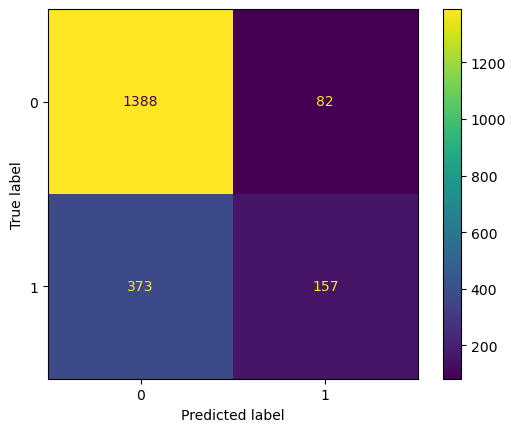

The training accuracy of the knn model is: 0.7885
The testing accuracy of the knn model is: 0.7725

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      1470
         1.0       0.66      0.30      0.41       530

    accuracy                           0.77      2000
   macro avg       0.72      0.62      0.63      2000
weighted avg       0.75      0.77      0.74      2000



In [32]:
#establishing a new k value of 37 and fitting my KNN model
ideal_knn = KNeighborsClassifier(n_neighbors=37)
ideal_knn.fit(X_train, y_train)

print("The accuracy of the new KNN model is: " + str(ideal_knn.score(X_test, y_test)))

#generating the confusion matrix for ideal model
y_pred = ideal_knn.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix (y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show() 

#determining training accuracy of model
print("The training accuracy of the knn model is: " + str(ideal_knn.score(X_train, y_train)))

#determining testing accuracy of model
print("The testing accuracy of the knn model is: " + str(ideal_knn.score(X_test, y_test)))

#printing classification report
print("\nClassification report:\n" + classification_report(y_test, y_pred))

### D3: Code
All code used to perform my classification analysis can be found within section D2.

### E1: Accuracy & Area Under the Curve

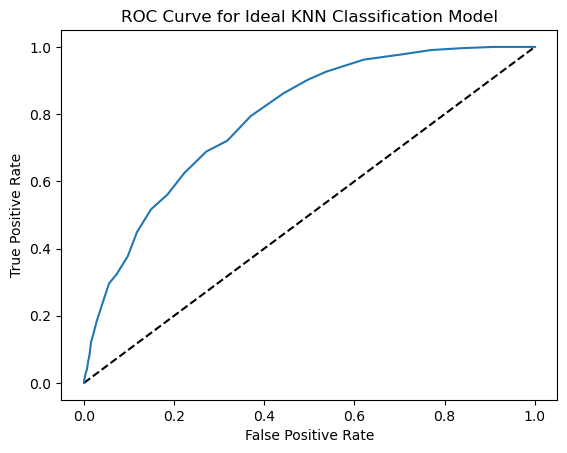

The area under the curve (AUC) for the knn model is: 0.7916788602233347


In [33]:
#printing ROC curve (Boorman, n.d.)
y_pred_probability = ideal_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ideal KNN Classification Model')
plt.show()

#determining the area under the curve for the ideal KNN model
print("The area under the curve (AUC) for the knn model is: " + str(roc_auc_score(y_test, y_pred_probability)))

Per the analysis I conducted in section D2, my KNN classification model demonstrates an accuracy of 77%. This is an improvement from the logistic model I created in D208, meaning that I have achieved my goal in creating a prediction model that would perform with better accuracy in classifying customers that will churn based on the training data provided.

The AUC result for my ROC curve from the KNN classification model built in section D is 0.79. For reference, AUC scores range from 0 to 1, with 1 denoting perfect capabilities of reaching true positive predictions. The dotted line represents an AUC of 0.5, indicating a classification model that makes pure guesses. Our AUC output demonstrates a fairly high capability in predicting when a customer will churn since it is a marked improvement from random classification, but still lacks perfect accuracy. 

### E2: Results
The accuracy of my aforementioned KNN model shows promise (77%) but there is still room for improvement. Practically speaking, I can only recommend this model be used in a formal corporate setting as a general guideline rather than a reliable prediction model. This is meant to be a tool for assessing the necessity of providing customers with tailored service packages and bonus service inclusions, which costs resources for the telecom company. Thus, to maintain efficiency in resource allocation and costs savings relying purely on a 77% accuracy is not condonable. As said above, at the very least this model can absolutely be used in assessing general customer sentiment.

The classification report notes a recall value of 0.30, meaning that this model was able to accurately identify 30% of the predictions as customers churning. Due to the lack of total customers churning within our dataset it is difficult for the model to develop a classification system built around identifying resulting churn status, if the dataset had more instances of customers churning I believe that the model would be able to develop better classification metrics.

### E3: Limitation
Taking into account the assumption of KNN classification; similar datapoints must exist wihtin relative distance to each other for the training data to be effective. It is apparent from both this assessment and previous assessments done using the churn dataset that the entries documented are quite vast and do not necessarily denote a consistency in data similarity and Euclidean proximity. Due to the dataset having a wide enough distribution it can be difficult for the knn classification model to develop a strong system in understanding appropriate mapping between training and testing data. This is supported by the ideal 'k' number of nearest neighbors being so high at 37, a greater spread necessitates a greater pool to select classification from. As such, the analysis is limited by the quality and consistency of the data itself as it demonstrates a randomness that skews the effectiveness of my classification model.

### E4: Recommendations
I have mentioned in the Results area of section E that the KNN classification system can serve internal stakeholders as an appropriate analysis of general subscription sentiment among current customers. This way, management can refer to the model to recognize current success and moments when they need to develop promotional deal campaigns that encourage customers to engage in additional support packages that save them money and boost customer satisfaction.

To further boost the accuracy of the classification model, I would encourage a stronger focus on the collection of data entries from customers who have churned, as this information is key to developing a strong model that can more accurately map the links to what indicators would classify a customer as churning from their subscription.

### F: Panopto
My panopto video can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f7483d1f-6639-470f-9336-b15d0017cf29

### G: Code Sources
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. https://scikit-learn.org/stable/modules/grid_search.html

Boorman, George. (n.d.). *Supervised Learning with scikit-learn [MOOC].* Datacamp. https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

Stack Overflow. (2018, Oct 20). *Implementing ROC Curves for K-NN machine learning algorithm using python and Scikit Learn.* https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

### H: Sources
Allibhai, Jaz. (2018, September 26). *Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn*. Medium. https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a 